The first visits were implemented on 20230620

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.convolution import convolve, Box1DKernel
from astropy.visualization import simple_norm
from photutils.aperture import aperture_photometry
from photutils.aperture import ApertureStats
import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from photutils.aperture import CircularAnnulus, CircularAperture
from astropy.stats import SigmaClip
from scipy.interpolate import interp1d

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/'
wpath = '{}wfc3/'.format(path)
apath = '{}acs/'.format(path)

WFC3 first

In [3]:
drcs = glob.glob('{}*drc.fits'.format(wpath))
drcs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01010_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01041_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01051_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01020_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01031_drc.fits']

In [4]:
flcs = glob.glob('{}*flc.fits'.format(wpath))
flcs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i0q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i1q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01iaq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i3q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i4q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i6q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i7q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i8q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i2q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i5q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01hzq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i9q_flc.fits']

In [5]:
eetab = Table.read('{}../wfc3uvis2_aper_007_syn.csv'.format(path))
eetab

FILTER,WAVELENGTH,APER#0.04,APER#0.08,APER#0.12,APER#0.16,APER#0.20,APER#0.24,APER#0.28,APER#0.32,APER#0.36,APER#0.40,APER#0.44,APER#0.48,APER#0.51,APER#0.55,APER#0.59,APER#0.63,APER#0.67,APER#0.71,APER#0.75,APER#0.79,APER#0.83,APER#0.87,APER#0.91,APER#0.95,APER#0.99,APER#1.03,APER#1.07,APER#1.11,APER#1.15,APER#1.19,APER#1.23,APER#1.27,APER#1.31,APER#1.35,APER#1.39,APER#1.43,APER#1.47,APER#1.50,APER#1.54,APER#1.58,APER#1.62,APER#1.66,APER#1.70,APER#1.74,APER#1.78,APER#1.82,APER#1.86,APER#1.90,APER#1.94,APER#1.98,APER#6.0
str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
FFFFF,2000.0,0.5713,0.6311,0.6845,0.7255,0.752,0.7757,0.7946,0.8086,0.8201,0.8312,0.8435,0.8558,0.8636,0.873,0.8817,0.8913,0.902,0.9129,0.9237,0.9337,0.9424,0.9499,0.9561,0.9614,0.966,0.9699,0.9733,0.9763,0.9788,0.981,0.9828,0.9843,0.9855,0.9865,0.9873,0.988,0.9886,0.989,0.9895,0.99,0.9904,0.9909,0.9913,0.9917,0.9921,0.9924,0.9928,0.9931,0.9935,0.9938,1.0
F218W,2223.7242894298383,0.5872,0.647,0.7001,0.7405,0.766,0.7886,0.8063,0.8194,0.8305,0.841,0.8521,0.863,0.8699,0.8784,0.8863,0.8949,0.9044,0.914,0.9235,0.9324,0.9401,0.9468,0.9525,0.9575,0.9618,0.9656,0.9691,0.9722,0.9749,0.9773,0.9794,0.9813,0.9828,0.9842,0.9854,0.9865,0.9874,0.988,0.9887,0.9894,0.99,0.9906,0.9911,0.9915,0.9919,0.9922,0.9926,0.9929,0.9932,0.9934,1.0
F225W,2358.3902256101073,0.6031,0.6628,0.7157,0.7555,0.78,0.8015,0.818,0.8303,0.8409,0.8508,0.8607,0.8702,0.8762,0.8838,0.8909,0.8986,0.9069,0.9152,0.9234,0.931,0.9378,0.9438,0.9489,0.9535,0.9576,0.9614,0.9648,0.968,0.9709,0.9736,0.976,0.9782,0.9802,0.9819,0.9835,0.9849,0.9862,0.987,0.988,0.9889,0.9896,0.9903,0.9909,0.9913,0.9917,0.9921,0.9924,0.9926,0.9929,0.9931,1.0
F275W,2703.297606591226,0.0639,0.295,0.5681,0.7241,0.79,0.8217,0.8389,0.8499,0.8583,0.8656,0.8722,0.8783,0.8826,0.8884,0.8946,0.9008,0.9065,0.912,0.9173,0.9225,0.9275,0.9324,0.9371,0.9417,0.9459,0.95,0.9536,0.9569,0.9599,0.9626,0.9649,0.967,0.9689,0.9705,0.972,0.9733,0.9745,0.9753,0.9764,0.9773,0.9782,0.979,0.9798,0.9805,0.9812,0.9818,0.9824,0.983,0.9835,0.984,1.0
F300X,2805.8406941029884,0.24029,0.54924,0.70461,0.77454,0.81001,0.83034,0.84388,0.85413,0.86251,0.86973,0.87606,0.88211,0.88814,0.89416,0.90025,0.90629,0.91201,0.91738,0.92268,0.92789,0.93306,0.93813,0.94289,0.94718,0.95122,0.95509,0.9588,0.9621,0.96487,0.96745,0.9698,0.97187,0.97376,0.97563,0.97718,0.97982,0.98259,0.98505,0.98564,0.98622,0.98681,0.9874,0.98799,0.98858,0.98916,0.98975,0.99034,0.99093,0.99152,0.9921,1.0
F280N,2829.9788818500247,0.27019,0.5746,0.71539,0.78092,0.81427,0.8329,0.84566,0.85563,0.86369,0.87069,0.87688,0.8818,0.88687,0.89218,0.89723,0.90212,0.90763,0.91256,0.91684,0.92161,0.92704,0.9322,0.93738,0.94274,0.94732,0.95172,0.95569,0.95976,0.96335,0.96678,0.96984,0.97276,0.97453,0.97543,0.9767,0.97964,0.98244,0.98493,0.98552,0.98612,0.98671,0.9873,0.9879,0.98849,0.98908,0.98968,0.99027,0.99087,0.99146,0.99205,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F763M,7612.744622820045,0.26773,0.55477,0.7152,0.81145,0.84248,0.85692,0.87002,0.88439,0.89693,0.90387,0.90954,0.91542,0.92223,0.92819,0.93206,0.93516,0.93845,0.94164,0.94411,0.94662,0.9492,0.95133,0.95338,0.95513,0.95628,0.9567,0.95778,0.95889,0.95942,0.95955,0.95992,0.96149,0.96251,0.96333,0.96488,0.96589,0.96691,0.96787,0.96855,0.96924,0.96992,0.9706,0.97128,0.97197,0.97265,0.97333,0.97401,0.9747,0.97538,0.97606,1.0
F775W,7648.3046091546,0.26053,0.54776,0.70804,0.80632,0.84195,0.85724,0.8703,0.88415,0.89622,0.90392,0.9

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01010_drc.fits
F275W
1770.0
   aperture_sum   
------------------
1.2972315777307615
5.452135430163548e-18 1.119714038477634e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   489.8   751.7        1.297          0.02707  -0.02097               1.318


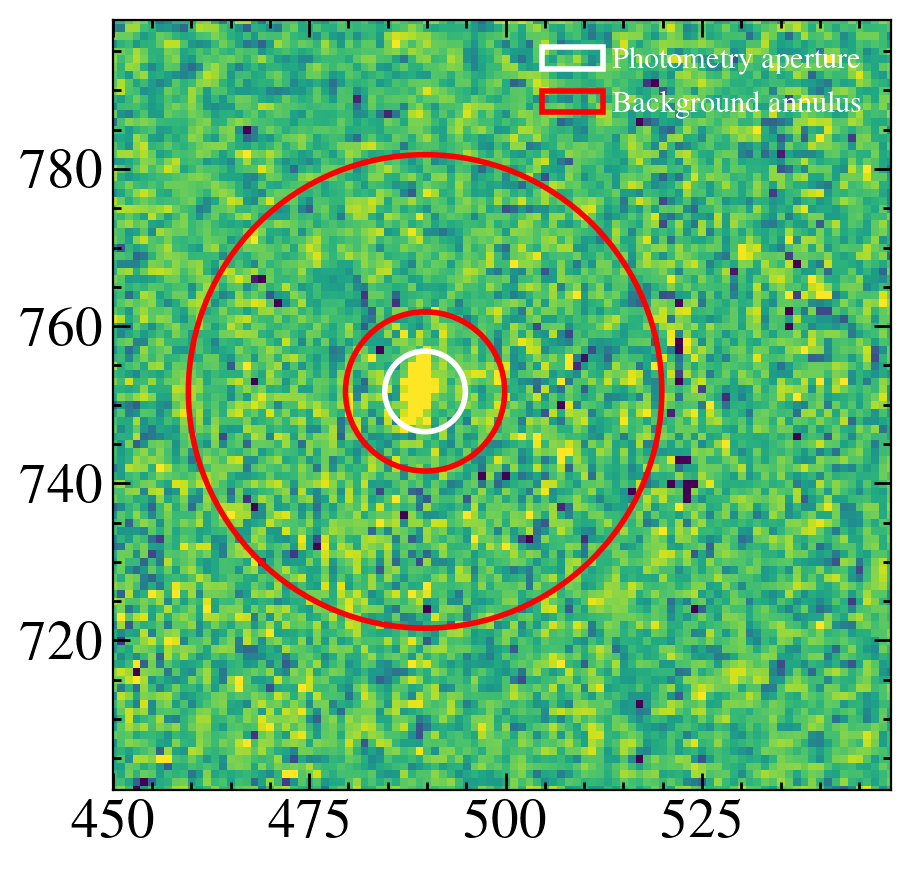

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01041_drc.fits
F225W
1180.0
    aperture_sum   
-------------------
0.44531551241464473
2.528341647072167e-18 1.1584765844502505e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   489.8   751.7       0.4453          0.01943   0.02134               0.424


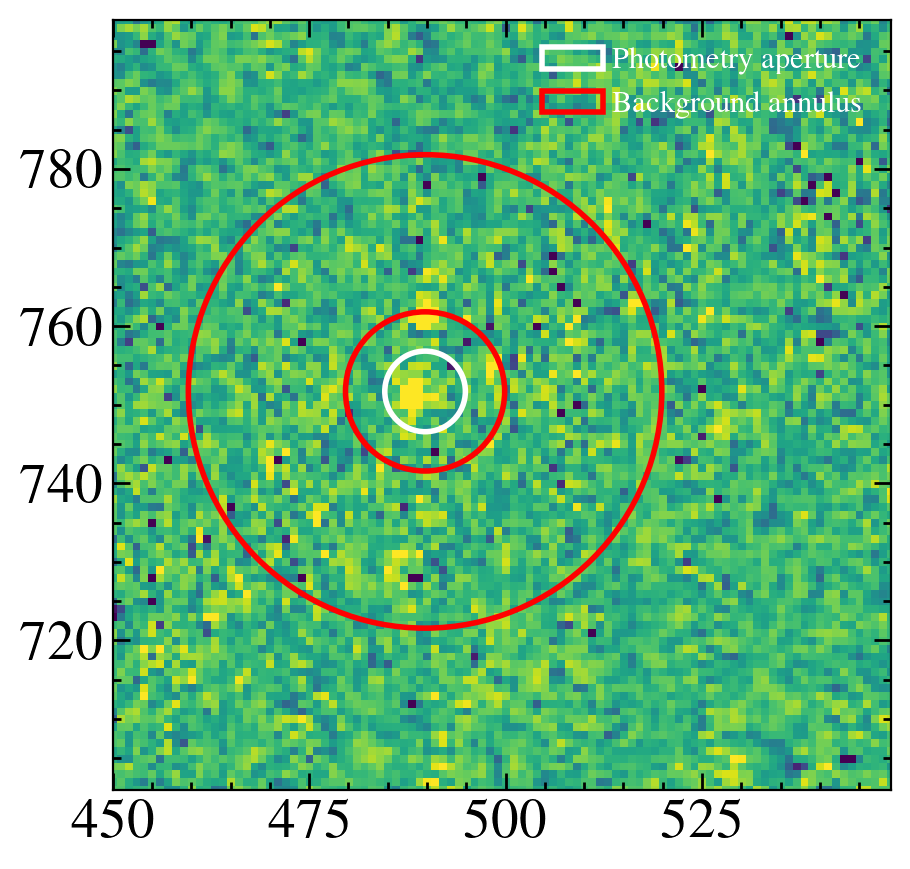

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01051_drc.fits
F225W
1180.0
   aperture_sum   
------------------
0.8851534882012018
5.1179708179262735e-18 1.6332880358261916e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   489.8   751.7       0.8852          0.02739   0.02692              0.8582


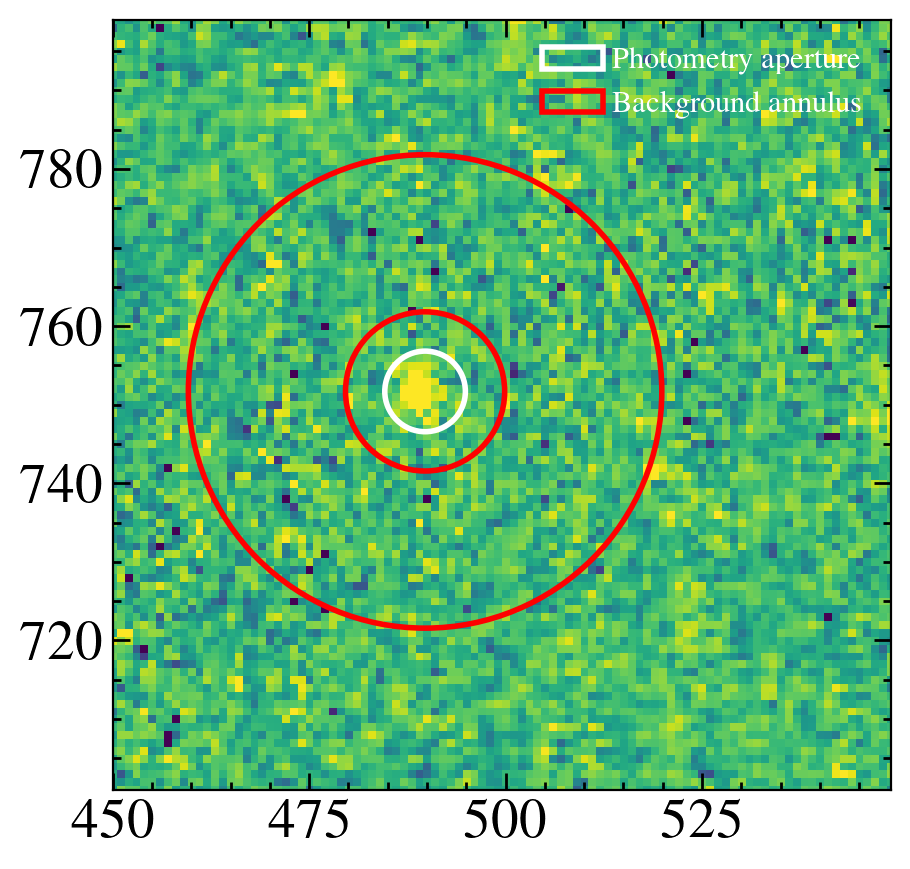

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01020_drc.fits
F280N
1770.0
   aperture_sum   
------------------
0.7843437268321656
5.126904013331354e-17 1.5297677866316075e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   489.8   751.7       0.7843          0.02105   0.07884              0.7055


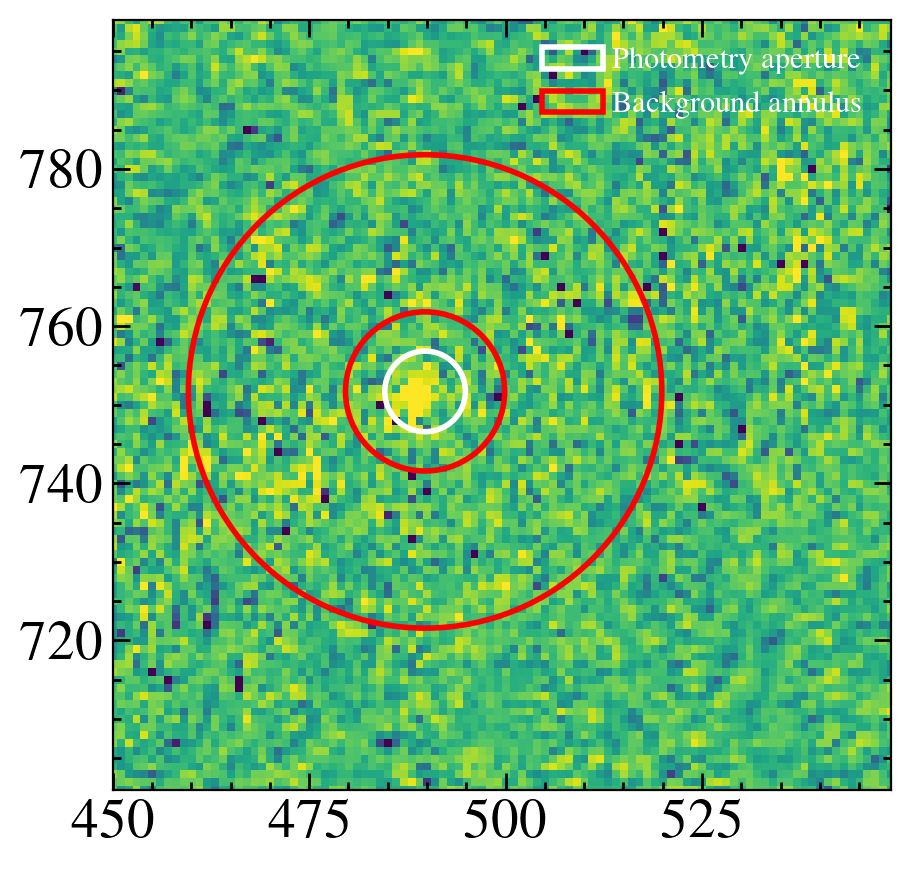

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01031_drc.fits
F225W
1180.0
   aperture_sum   
------------------
0.8320296722898983
4.958936958880467e-18 1.583516615679441e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   489.8   751.7        0.832          0.02655 0.0004682              0.8316


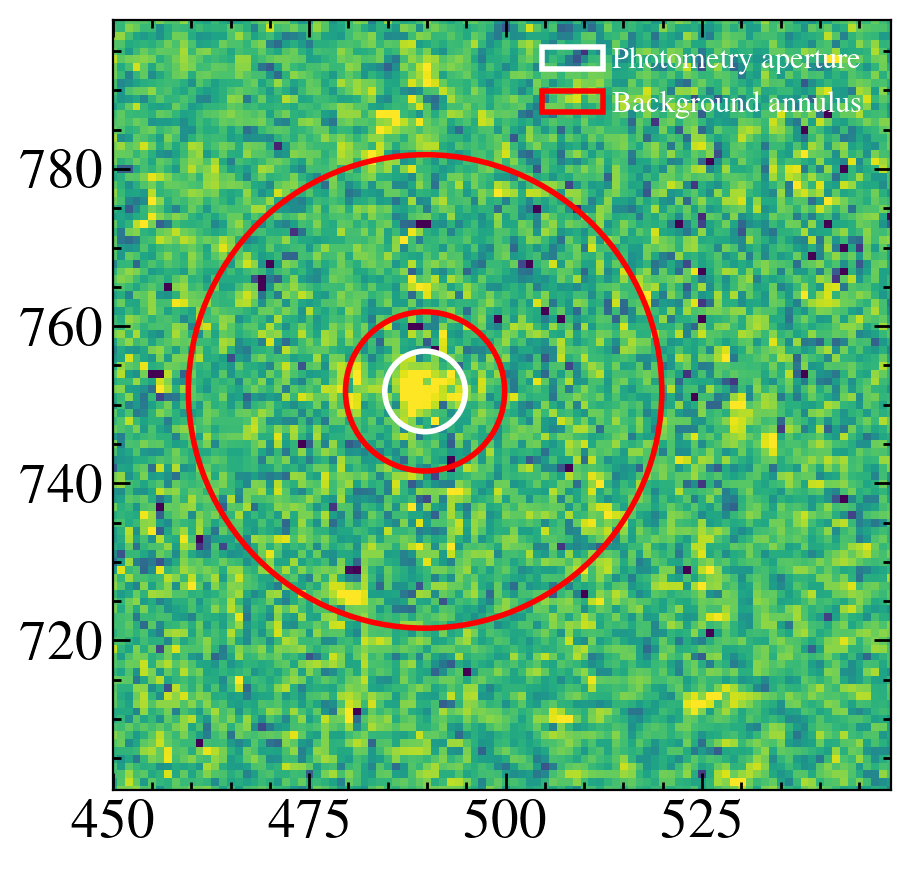

In [6]:
wfc3_pos = [(489.752, 751.70)]
pixscale = 0.039
ap_arc = '0.20' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
for drc in drcs:
    print(drc)
    hdul = fits.open(drc)
    filt = hdul[0].header['FILTER'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
    data = np.nan_to_num(data, 0.0)
#     error = hdul[2].data
#     dq = hdul[3].data
#     mask = dq != 0
#     error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(450, 549)
    plt.ylim(701, 799)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(wfc3_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(wfc3_pos, r_in=ap_pix+5, r_out=ap_pix+25)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
    phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
    phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
    ee = eetab['APER#{}'.format(ap_arc)][eetab['FILTER'] == filt][0]
#     print(ee[0])
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam /ee
    flux_err = phot_table['aperture_sum_err'][0]* photflam /ee
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)

    print(phot_table)
    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)

In [7]:
eetab = Table.read('{}../wfc3uvis2_aper_007_syn.csv'.format(path))
eetab

FILTER,WAVELENGTH,APER#0.04,APER#0.08,APER#0.12,APER#0.16,APER#0.20,APER#0.24,APER#0.28,APER#0.32,APER#0.36,APER#0.40,APER#0.44,APER#0.48,APER#0.51,APER#0.55,APER#0.59,APER#0.63,APER#0.67,APER#0.71,APER#0.75,APER#0.79,APER#0.83,APER#0.87,APER#0.91,APER#0.95,APER#0.99,APER#1.03,APER#1.07,APER#1.11,APER#1.15,APER#1.19,APER#1.23,APER#1.27,APER#1.31,APER#1.35,APER#1.39,APER#1.43,APER#1.47,APER#1.50,APER#1.54,APER#1.58,APER#1.62,APER#1.66,APER#1.70,APER#1.74,APER#1.78,APER#1.82,APER#1.86,APER#1.90,APER#1.94,APER#1.98,APER#6.0
str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
FFFFF,2000.0,0.5713,0.6311,0.6845,0.7255,0.752,0.7757,0.7946,0.8086,0.8201,0.8312,0.8435,0.8558,0.8636,0.873,0.8817,0.8913,0.902,0.9129,0.9237,0.9337,0.9424,0.9499,0.9561,0.9614,0.966,0.9699,0.9733,0.9763,0.9788,0.981,0.9828,0.9843,0.9855,0.9865,0.9873,0.988,0.9886,0.989,0.9895,0.99,0.9904,0.9909,0.9913,0.9917,0.9921,0.9924,0.9928,0.9931,0.9935,0.9938,1.0
F218W,2223.7242894298383,0.5872,0.647,0.7001,0.7405,0.766,0.7886,0.8063,0.8194,0.8305,0.841,0.8521,0.863,0.8699,0.8784,0.8863,0.8949,0.9044,0.914,0.9235,0.9324,0.9401,0.9468,0.9525,0.9575,0.9618,0.9656,0.9691,0.9722,0.9749,0.9773,0.9794,0.9813,0.9828,0.9842,0.9854,0.9865,0.9874,0.988,0.9887,0.9894,0.99,0.9906,0.9911,0.9915,0.9919,0.9922,0.9926,0.9929,0.9932,0.9934,1.0
F225W,2358.3902256101073,0.6031,0.6628,0.7157,0.7555,0.78,0.8015,0.818,0.8303,0.8409,0.8508,0.8607,0.8702,0.8762,0.8838,0.8909,0.8986,0.9069,0.9152,0.9234,0.931,0.9378,0.9438,0.9489,0.9535,0.9576,0.9614,0.9648,0.968,0.9709,0.9736,0.976,0.9782,0.9802,0.9819,0.9835,0.9849,0.9862,0.987,0.988,0.9889,0.9896,0.9903,0.9909,0.9913,0.9917,0.9921,0.9924,0.9926,0.9929,0.9931,1.0
F275W,2703.297606591226,0.0639,0.295,0.5681,0.7241,0.79,0.8217,0.8389,0.8499,0.8583,0.8656,0.8722,0.8783,0.8826,0.8884,0.8946,0.9008,0.9065,0.912,0.9173,0.9225,0.9275,0.9324,0.9371,0.9417,0.9459,0.95,0.9536,0.9569,0.9599,0.9626,0.9649,0.967,0.9689,0.9705,0.972,0.9733,0.9745,0.9753,0.9764,0.9773,0.9782,0.979,0.9798,0.9805,0.9812,0.9818,0.9824,0.983,0.9835,0.984,1.0
F300X,2805.8406941029884,0.24029,0.54924,0.70461,0.77454,0.81001,0.83034,0.84388,0.85413,0.86251,0.86973,0.87606,0.88211,0.88814,0.89416,0.90025,0.90629,0.91201,0.91738,0.92268,0.92789,0.93306,0.93813,0.94289,0.94718,0.95122,0.95509,0.9588,0.9621,0.96487,0.96745,0.9698,0.97187,0.97376,0.97563,0.97718,0.97982,0.98259,0.98505,0.98564,0.98622,0.98681,0.9874,0.98799,0.98858,0.98916,0.98975,0.99034,0.99093,0.99152,0.9921,1.0
F280N,2829.9788818500247,0.27019,0.5746,0.71539,0.78092,0.81427,0.8329,0.84566,0.85563,0.86369,0.87069,0.87688,0.8818,0.88687,0.89218,0.89723,0.90212,0.90763,0.91256,0.91684,0.92161,0.92704,0.9322,0.93738,0.94274,0.94732,0.95172,0.95569,0.95976,0.96335,0.96678,0.96984,0.97276,0.97453,0.97543,0.9767,0.97964,0.98244,0.98493,0.98552,0.98612,0.98671,0.9873,0.9879,0.98849,0.98908,0.98968,0.99027,0.99087,0.99146,0.99205,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F763M,7612.744622820045,0.26773,0.55477,0.7152,0.81145,0.84248,0.85692,0.87002,0.88439,0.89693,0.90387,0.90954,0.91542,0.92223,0.92819,0.93206,0.93516,0.93845,0.94164,0.94411,0.94662,0.9492,0.95133,0.95338,0.95513,0.95628,0.9567,0.95778,0.95889,0.95942,0.95955,0.95992,0.96149,0.96251,0.96333,0.96488,0.96589,0.96691,0.96787,0.96855,0.96924,0.96992,0.9706,0.97128,0.97197,0.97265,0.97333,0.97401,0.9747,0.97538,0.97606,1.0
F775W,7648.3046091546,0.26053,0.54776,0.70804,0.80632,0.84195,0.85724,0.8703,0.88415,0.89622,0.90392,0.9

In [8]:
0.4/0.039

10.256410256410257

In [9]:
340e-18*1.5

5.1e-16

In [10]:
mpath = '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/TRAPPIST-1/'

nuv = fits.getdata('{}hlsp_muscles_hst_cos_trappist-1_g230l_v10_component-spec.fits'.format(mpath), 1)
wn, fn, en = nuv['WAVELENGTH'], nuv['FLUX'], nuv['ERROR']
mask = (wn > 2300) & (wn < 3000)
wn, fn, en = wn[mask], fn[mask], en[mask]



['F275W', 'F225W', 'F225W', 'F280N', 'F225W'] [5.452135430163548e-18, 2.528341647072167e-18, 5.1179708179262735e-18, 5.126904013331354e-17, 4.958936958880467e-18] [1.119714038477634e-19, 1.1584765844502505e-19, 1.6332880358261916e-19, 1.5297677866316075e-18, 1.583516615679441e-19] [48.69221286 21.82471084 31.33538424 33.51426313 31.31597679]


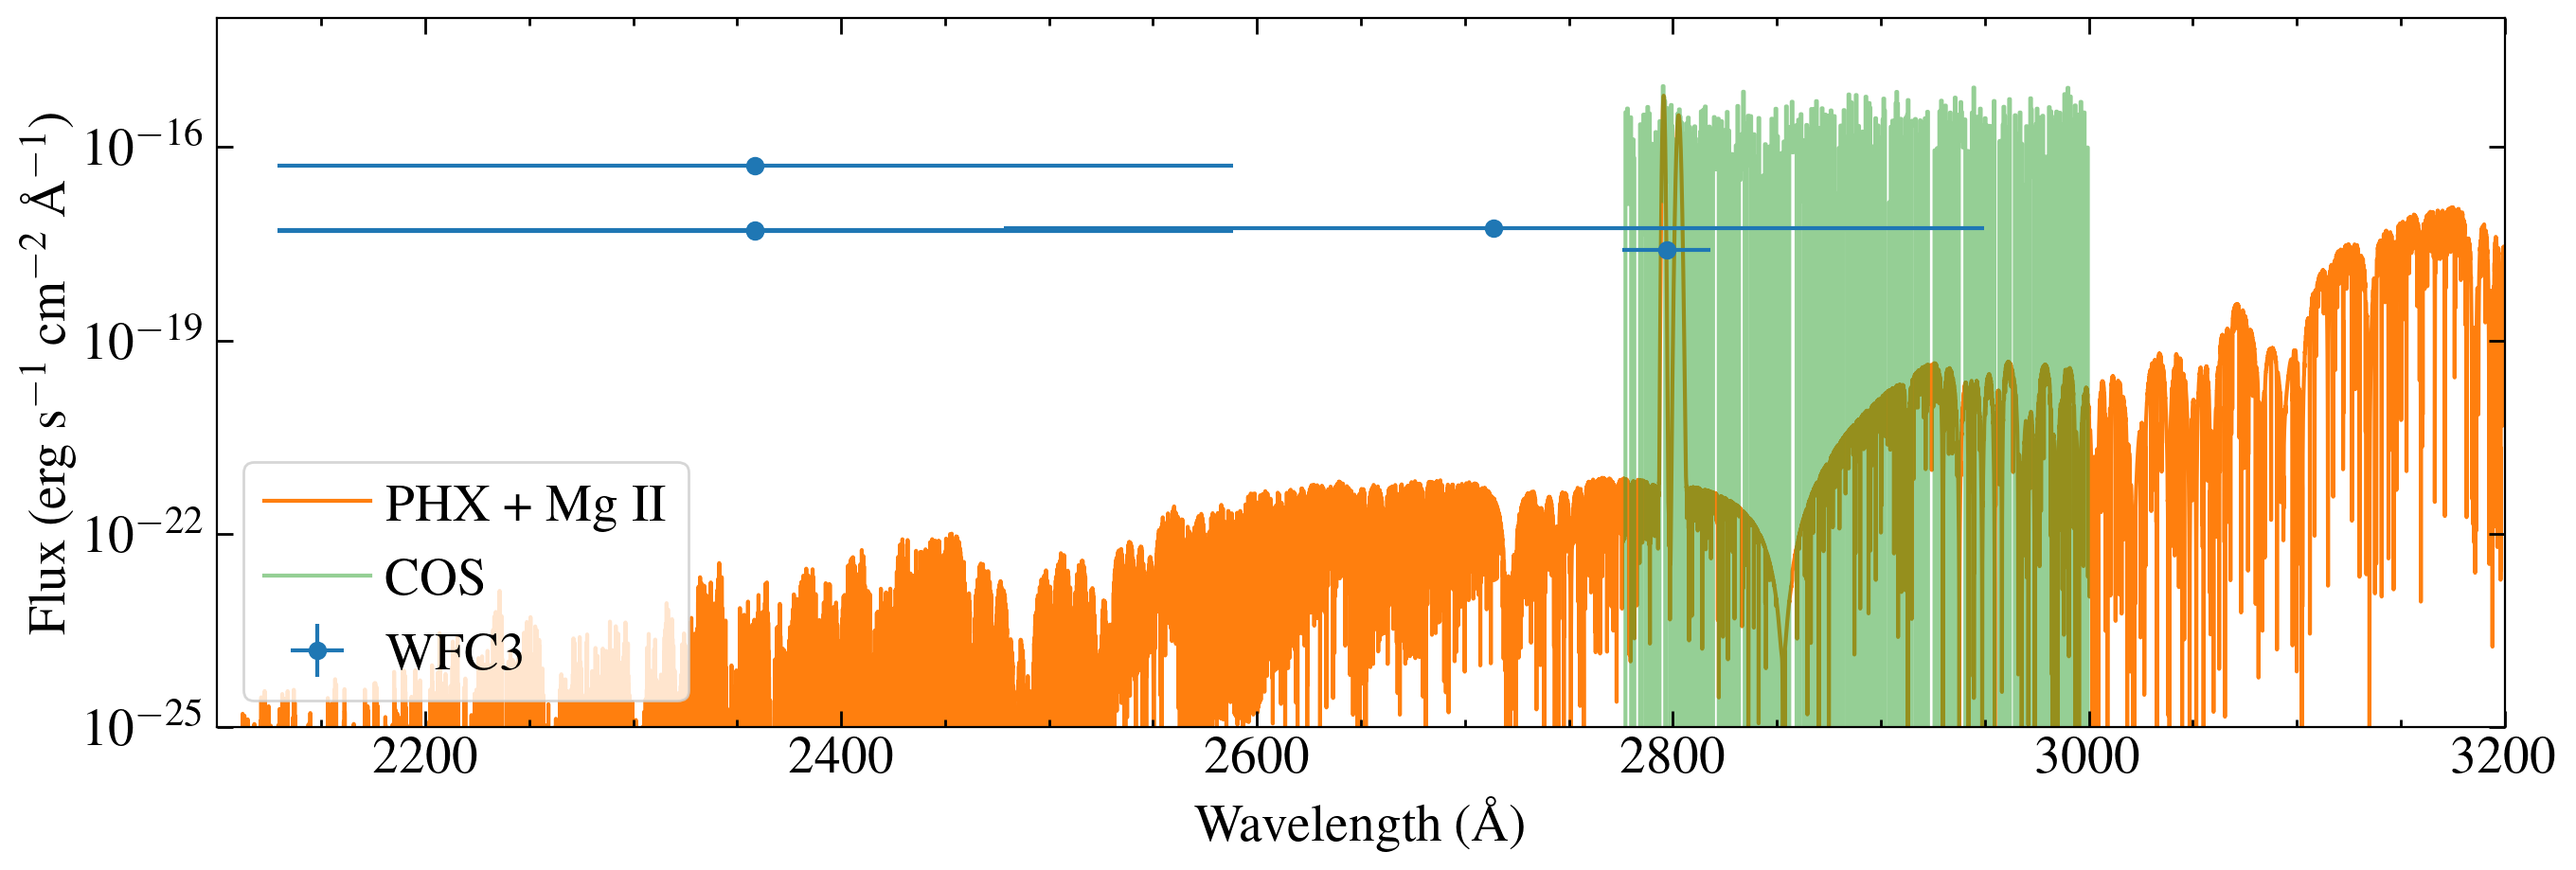

In [11]:
print(filters, fluxes, flux_errs, np.array(fluxes)/np.array(flux_errs))
cenwaves = [2713.86, 2796.94, 2358.70, 2358.70 , 2358.70]
widths = np.array([471.42, 42.16, 459.87 , 459.87 , 459.87 ])
# bands = ['F275W', 'F280N', 'F225W']

fig, ax=plt.subplots()

w, f = np.loadtxt('t1uv_model_v2.dat', unpack=True)
plt.plot(w, f, zorder=-1, c='C1', label ='PHX + Mg II')

plt.step(wn, fn, alpha =0.5, where='mid', zorder=-1, c='C2', label='COS')
plt.errorbar(cenwaves, fluxes, yerr=flux_errs, xerr=widths/2, marker='o', ls='none', label='WFC3', zorder=10, c='C0')
 
ax.legend(frameon=True, loc=3)
    
plt.yscale('log')
plt.ylim(1e-25, 1e-14)
plt.xlim(2100, 3200)

ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')

fig.tight_layout()

savdat = Table([cenwaves*u.AA, fluxes*u.erg/u.s/u.cm**2/u.AA, flux_errs*u.erg/u.s/u.cm**2/u.AA, widths*u.AA, filters], names = ['WAVELENGTH', 'FLUX', 'ERROR', 'FWHM', 'FILTER'])
savdat.write('results/epoch1_wfc_photometry.ecsv', format='ascii.ecsv', overwrite=True)

Need to integrate the model over the fliters so I'm sure it's not just the Mg II lines... pysynphot doesn't work for python 3.10, have to do it by hand.

In [12]:
def make_phot(bp_w, bp_cc, w, f):
    mask = (w >= bp_w[0]) & (w <= bp_w[-1])
    w, f = w[mask], f[mask]
    bb_cci = interp1d(bp_w, bp_cc, fill_value='extrapolate')(w)
    return np.trapz(f*bb_cci, w)/np.trapz(bb_cci, w)

In [13]:
bands= glob.glob('filters/*UVIS*')
bands

['filters/HST_WFC3_UVIS2.F275W.dat',
 'filters/HST_WFC3_UVIS2.F225W.dat',
 'filters/HST_WFC3_UVIS2.F280N.dat']

In [14]:
phot_w = np.array([2713.86, 2358.7, 2796.94])
phot_f = []
for band in bands:
    bpw, bpf = np.loadtxt(band, unpack=True)
    phot = make_phot(bpw, bpf, w, f)
    phot_f.append(phot)
print(phot_f)

[1.791268145160082e-18, 1.5468124773685447e-19, 2.8340546061028076e-17]


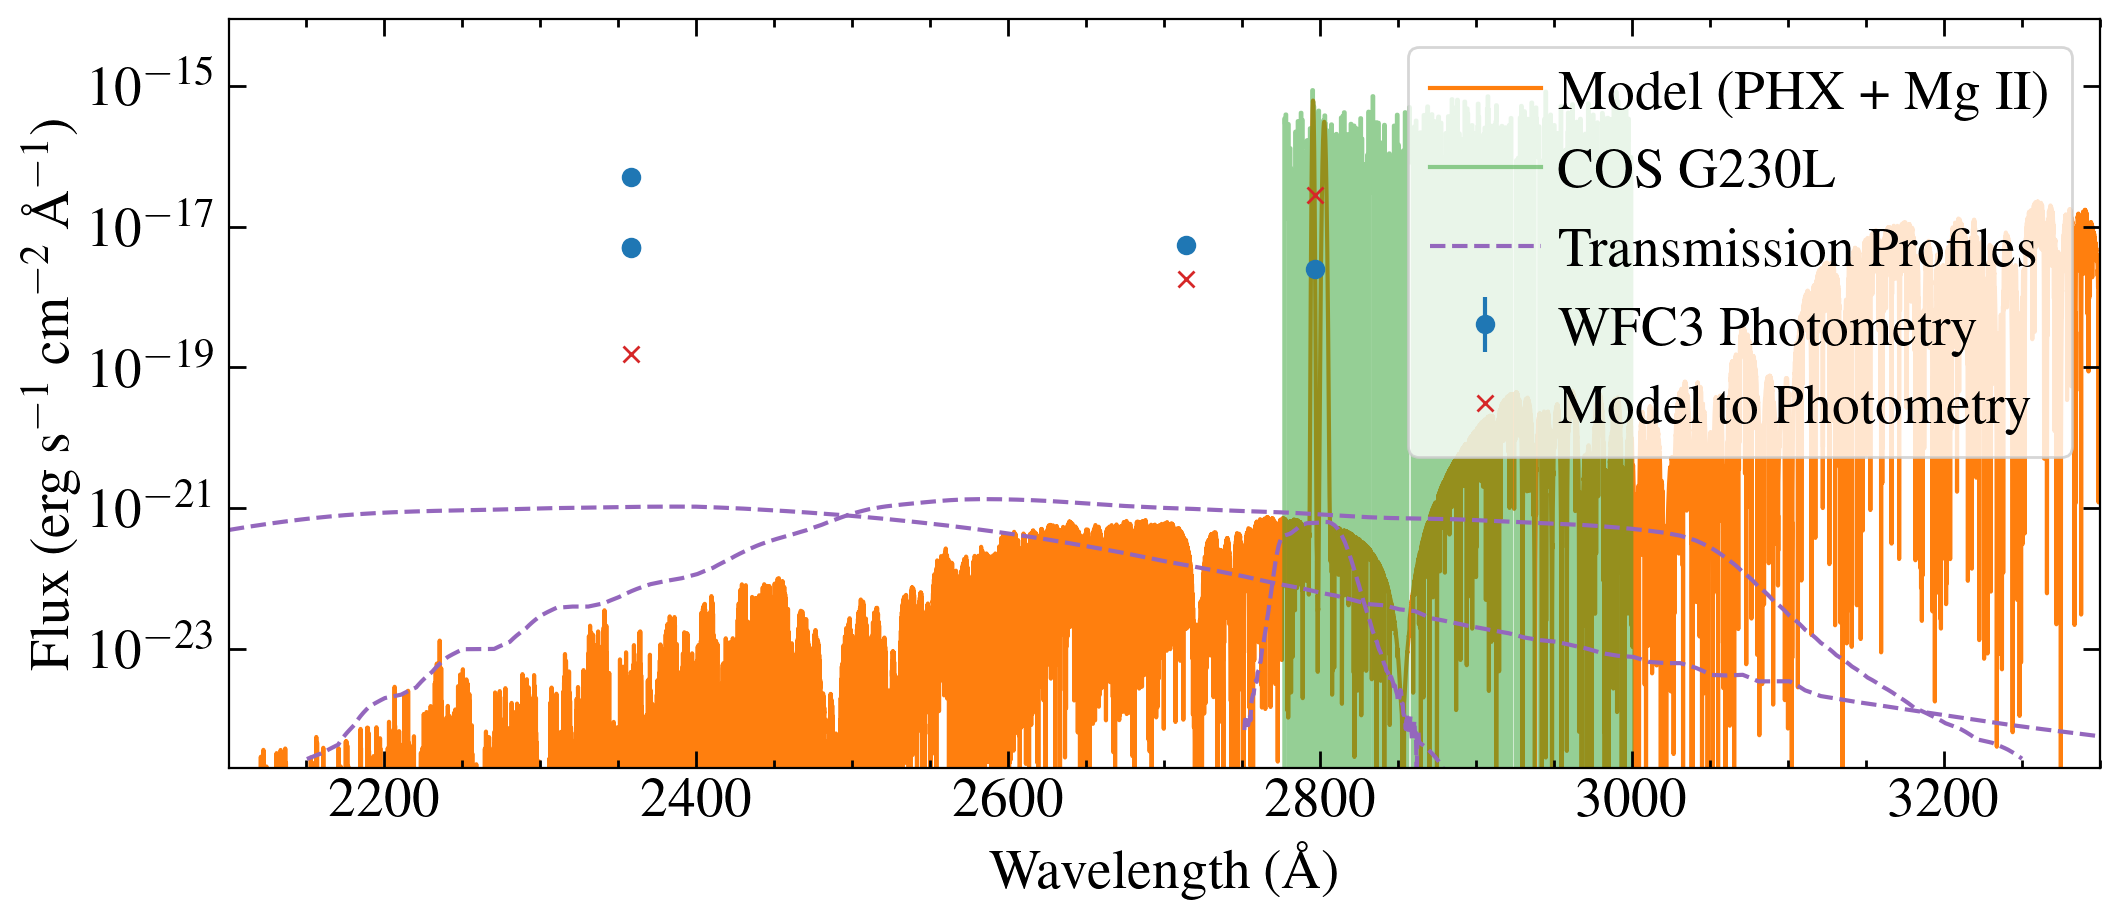

In [15]:
# print(filters, fluxes, flux_errs, np.array(fluxes)/np.array(flux_errs))
# cenwaves = [2713.86, 2796.94, 2358.70, 2358.70 , 2358.70]
# widths = np.array([471.42, 42.16, 459.87 , 459.87 , 459.87 ])

fig, ax=plt.subplots(figsize=(11, 5))

w, f = np.loadtxt('t1uv_model_v2.dat', unpack=True)
plt.plot(w, f, zorder=-1, c='C1', label ='Model (PHX + Mg II)')

plt.step(wn, fn, alpha =0.5, where='mid', zorder=-1, c='C2', label='COS G230L')
plt.errorbar(cenwaves, fluxes, yerr=flux_errs, marker='o', ls='none', label='WFC3 Photometry', zorder=10, c='C0')
plt.errorbar(phot_w, phot_f, marker='x', ls='none', label='Model to Photometry', zorder=8, c='C3')


# ax.legend(frameon=True, loc=1)
    
plt.yscale('log')
plt.ylim(2e-25, 9e-15)
plt.xlim(2101, 3300)

for band in bands:
    bpw, bpf = np.loadtxt(band, unpack=True)
    ax.plot(bpw, bpf*1e-20, ls ='--', c='C4', label = 'Transmission Profiles')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=1)
    
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')

fig.tight_layout()

fig.savefig('plots/t1_wfc3_epoch1_1stlook.pdf')
fig.savefig('plots/t1_wfc3_epoch1_1stlook.png', facecolor='w')

Next step - work out the timings/subexposures of the photometry.

In [16]:


mids = (starts + ends) / 2
halfs = (mids - starts)*u.d.to(u.min)
mids0 = (mids-min(starts))*u.d.to(u.min)

<ErrorbarContainer object of 3 artists>

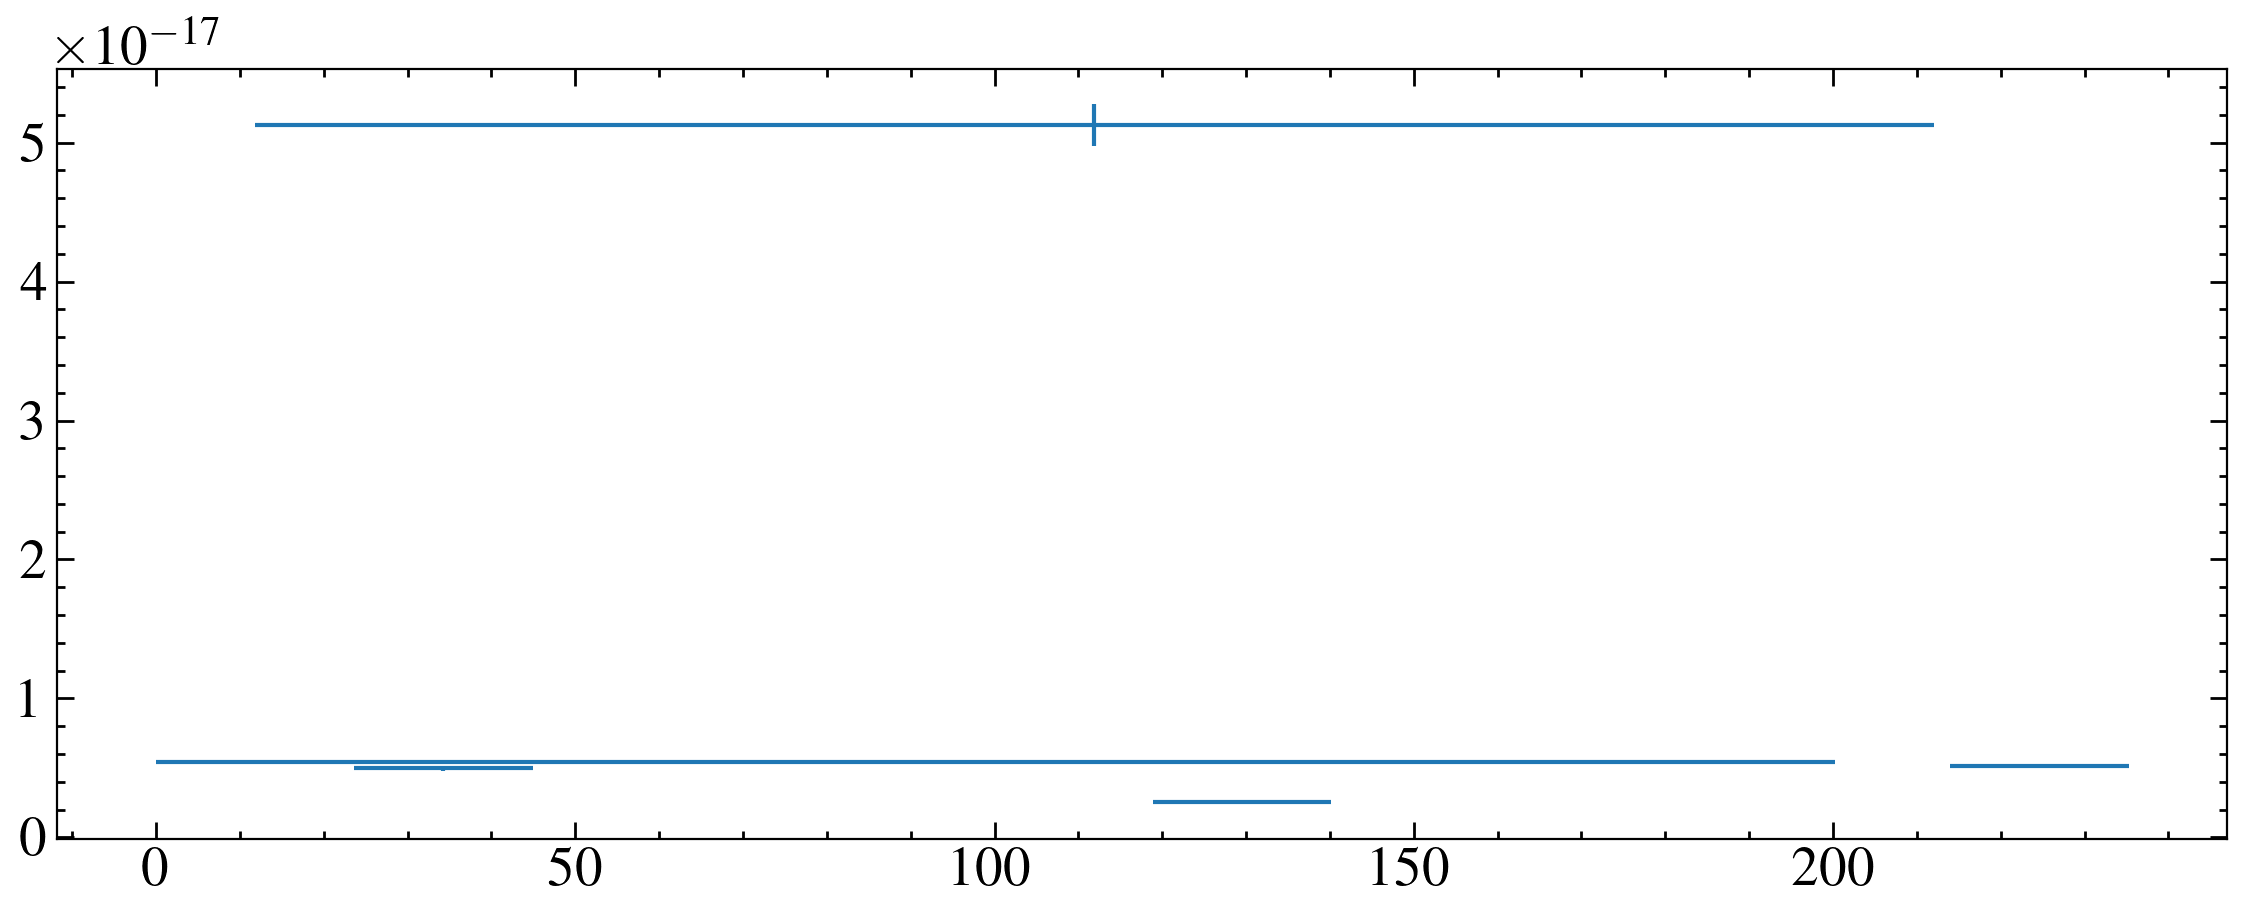

In [17]:
plt.errorbar(mids0, fluxes, yerr=flux_errs, xerr=halfs, ls='none')

All over the place? Look at individual flt images?

In [18]:
flcs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i0q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i1q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01iaq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i3q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i4q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i6q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i7q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i8q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i2q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i5q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01hzq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i9q_flc.fits']

In [38]:
def make_PAMcorr_image_UVIS(data, scihdr, pamdir):
    """
    Corrects the geometric distortion of the input image
    data by multiplying by the correct UVIS PAM.
    Parameters
    ----------
    data : array
        Image data before correction.
    scihdr : header
        Header from science extension of data.
    pamdir : str
        Path to where pixel area maps for UVIS1 and/or
        UVIS2 are located.
    Returns
    -------
    pamcorr_data : array
        PAM-corrected data.
    """

    data = np.copy(data)
    x0 = int(np.abs(scihdr['LTV1']))
    y0 = int(np.abs(scihdr['LTV2']))
    x1 = int(x0 + scihdr['NAXIS1'])
    y1 = int(y0 + scihdr['NAXIS2'])
    

    if scihdr['CCDCHIP'] == 1:
        pam = fits.getdata(pamdir + 'UVIS1wfc3_map.fits')
        pamcorr_data = data * pam[y0:y1, x0:x1]

    elif scihdr['CCDCHIP'] == 2:
        pam = fits.getdata(pamdir + 'UVIS2wfc3_map.fits')
        pamcorr_data = data * pam[y0:y1, x0:x1]
    else:
        raise Exception('Chip case not handled.')

    return pamcorr_data

In [19]:
roots = []
bands = []
times = []
expt = []
for flc in flcs:
    hdr = fits.getheader(flc, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
roots, bands, times, expt = np.array(roots), np.array(bands), np.array(times), np.array(expt)    
args = np.argsort(times)
roots, bands, times, expt = roots[args], bands[args], times[args], expt[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

if3i01hzq F275W 60115.74853343 590.0
if3i01i0q F280N 60115.75671639 590.0
if3i01i1q F225W 60115.7649338 590.0
if3i01i2q F225W 60115.77288528 590.0
if3i01i3q F275W 60115.81469083 590.0
if3i01i4q F280N 60115.8228738 590.0
if3i01i5q F225W 60115.8310912 590.0
if3i01i6q F225W 60115.83904269 590.0
if3i01i7q F275W 60115.88073269 590.0
if3i01i8q F280N 60115.88891528 590.0
if3i01i9q F225W 60115.89713306 590.0
if3i01iaq F225W 60115.90508454 590.0


[None, None, None, None, None, None, None, None, None, None, None, None]

Redoing photometry with flc files 

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i0q_flc.fits
F280N
590.0
   aperture_sum  
-----------------
438.0714501122727
3.083766694000264e-14 3.3849434140782294e-15
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     484     720        438.1            46.58     13.72               424.3


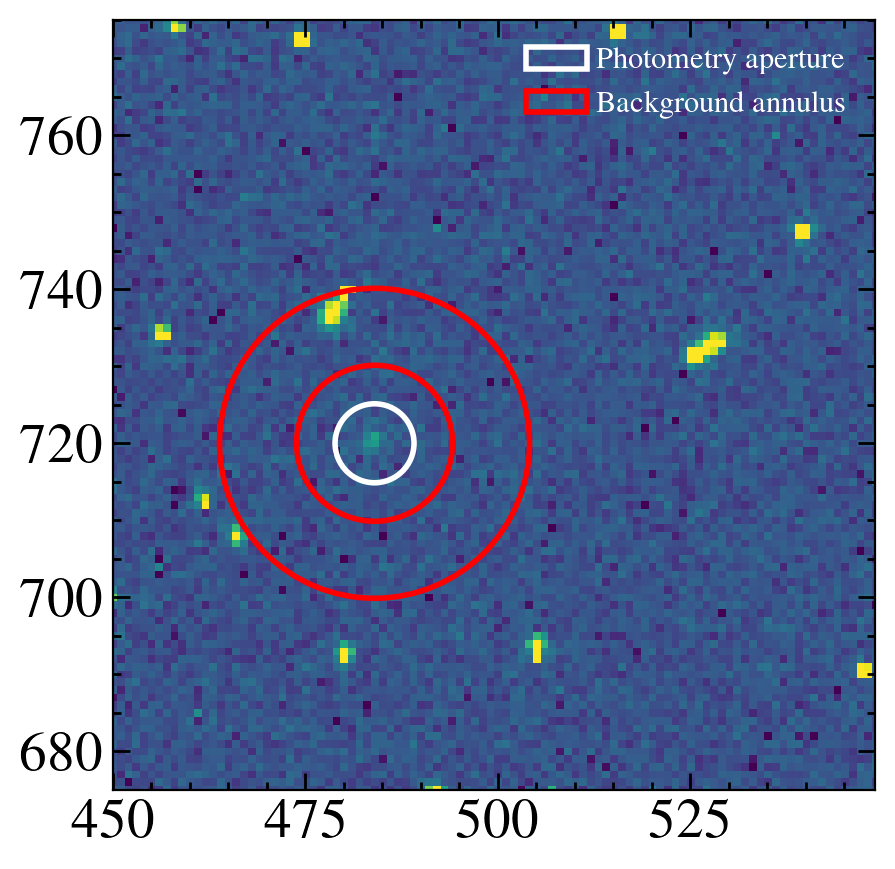

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i1q_flc.fits
F225W
590.0
   aperture_sum  
-----------------
518.7380392492407
2.7818779945262753e-15 2.4621805062210906e-16
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     484     720        518.7            41.29     52.25               466.5


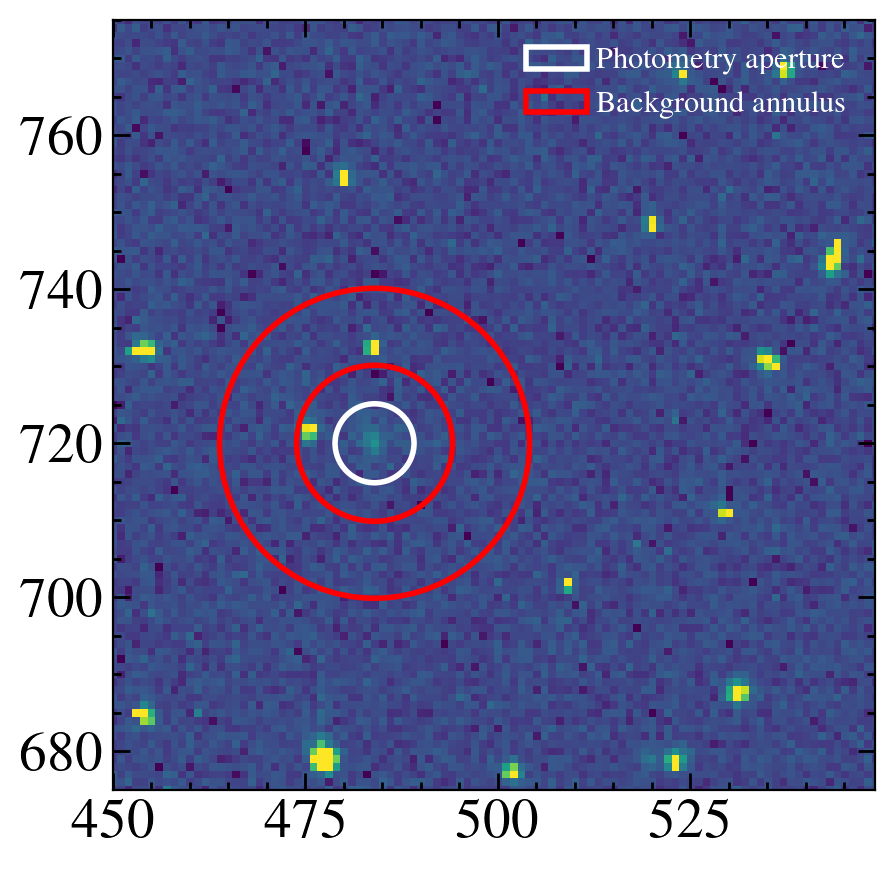

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01iaq_flc.fits
F225W
590.0
   aperture_sum  
-----------------
550.6543473288893
3.541730221473765e-15 2.4597427815830186e-16
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     484     720        550.7            41.25    -43.26               593.9


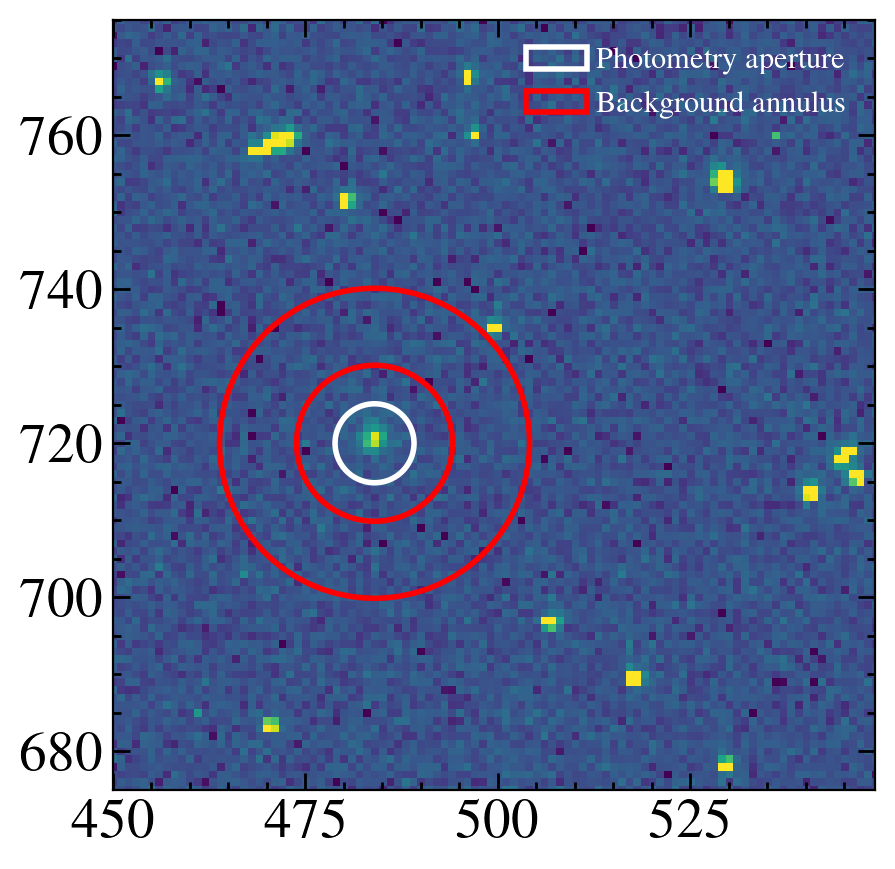

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i3q_flc.fits
F275W
590.0
   aperture_sum  
-----------------
693.7959212195502
2.787822024648496e-15 2.062086908599843e-16
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     484     720        693.8            49.86     19.76                 674


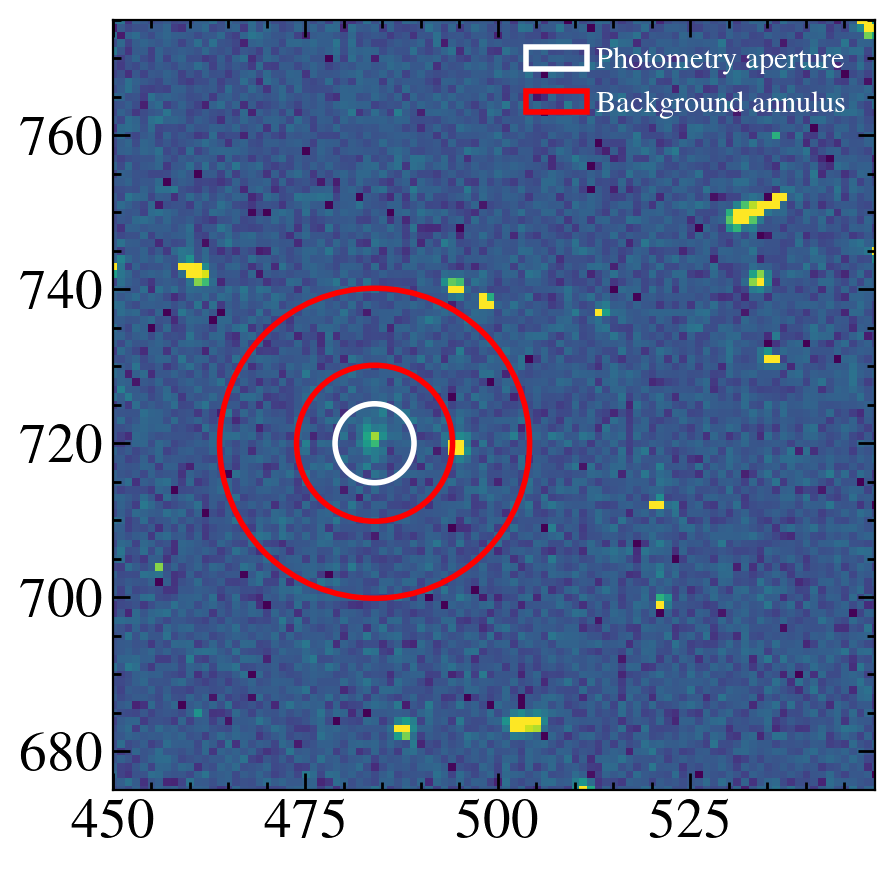

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i4q_flc.fits
F280N
590.0
   aperture_sum   
------------------
447.07947865111424
2.745906227463606e-14 3.3344592987618606e-15
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     484     720        447.1            45.88     69.22               377.9


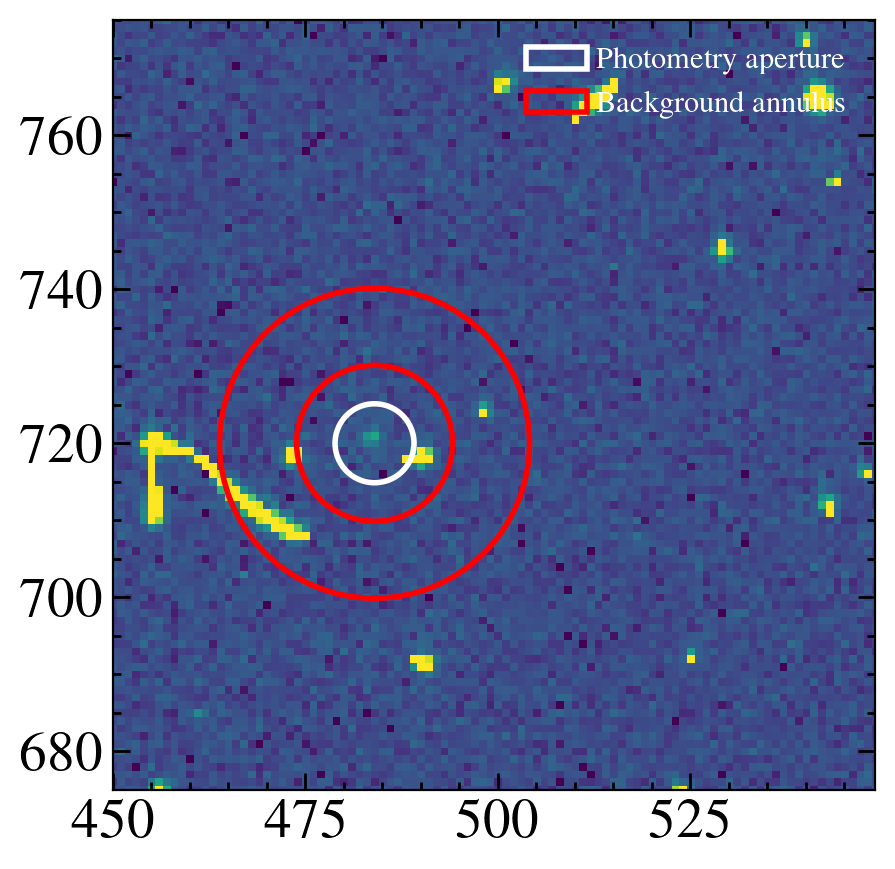

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i6q_flc.fits
F225W
590.0
   aperture_sum   
------------------
214.11487245075335
1.3974209588410503e-15 2.279604370847709e-16
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     484     720        214.1            38.23    -20.22               234.3


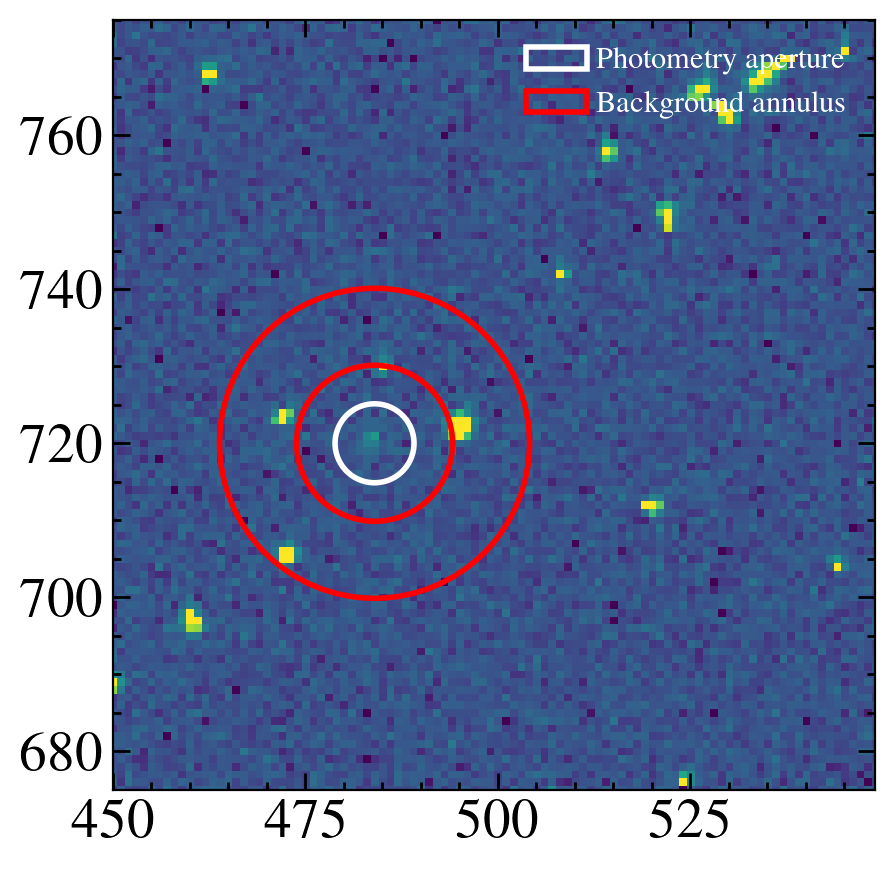

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i7q_flc.fits
F275W
590.0
  aperture_sum  
----------------
676.099263956928
2.672810878324607e-15 2.0402199260252226e-16
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     484     720        676.1            49.33     29.88               646.2


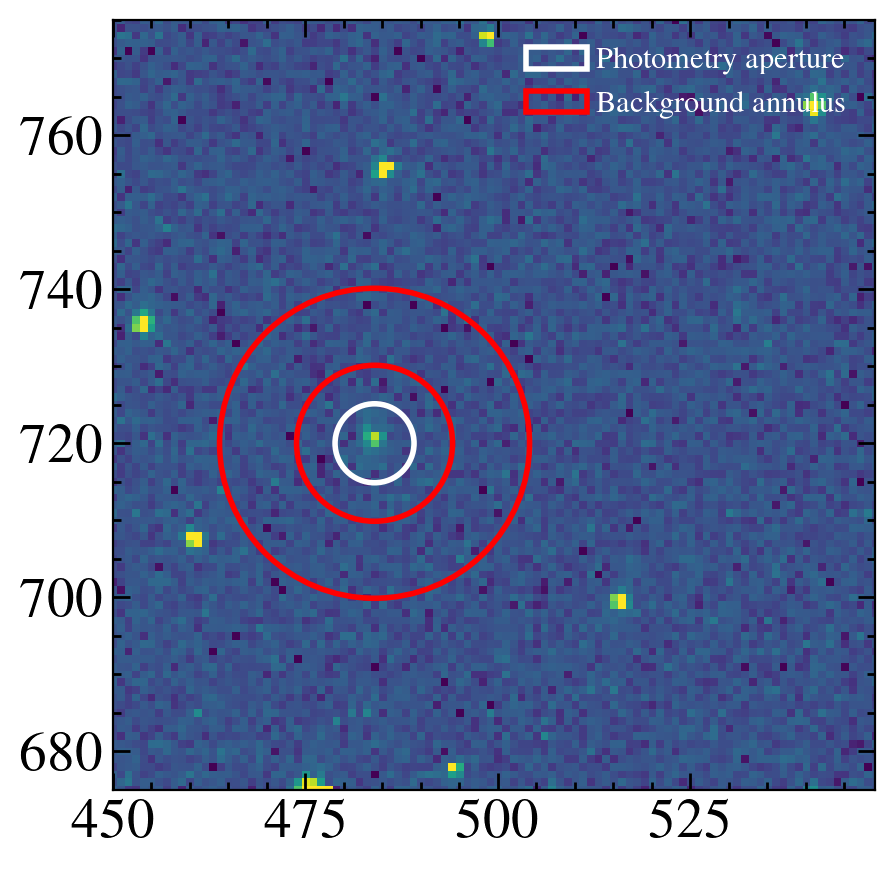

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i8q_flc.fits
F280N
590.0
   aperture_sum   
------------------
407.85683620641106
2.4342314181696417e-14 3.371379186418818e-15
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     484     720        407.9            46.39     72.89                 335


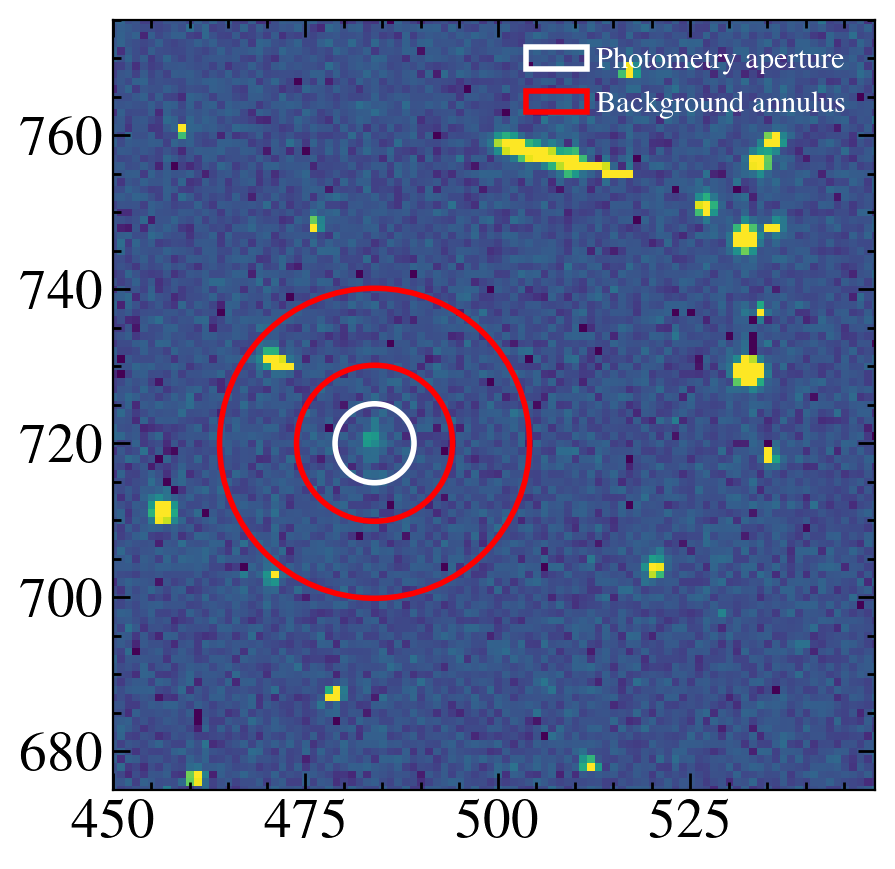

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i2q_flc.fits
F225W
590.0
   aperture_sum   
------------------
347.15352810656367
2.376573590223191e-15 2.278015971957571e-16
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     484     720        347.2             38.2    -51.37               398.5


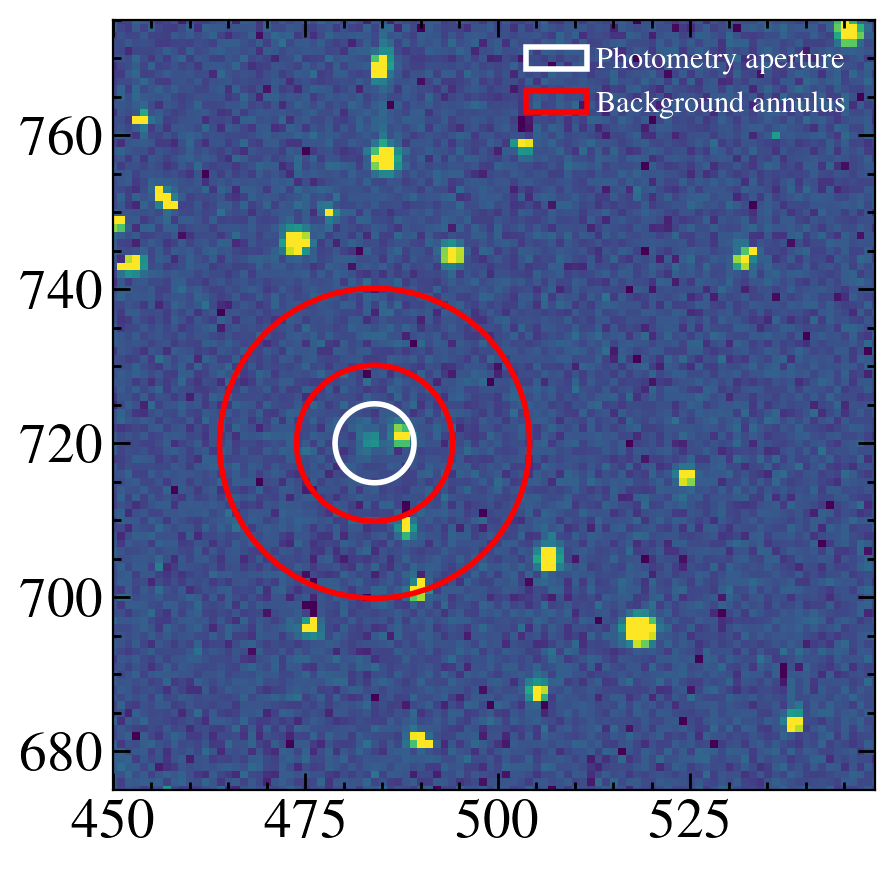

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i5q_flc.fits
F225W
590.0
   aperture_sum  
-----------------
304.2035018191677
1.7370185208100567e-15 2.356747034222742e-16
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     484     720        304.2            39.52     12.92               291.3


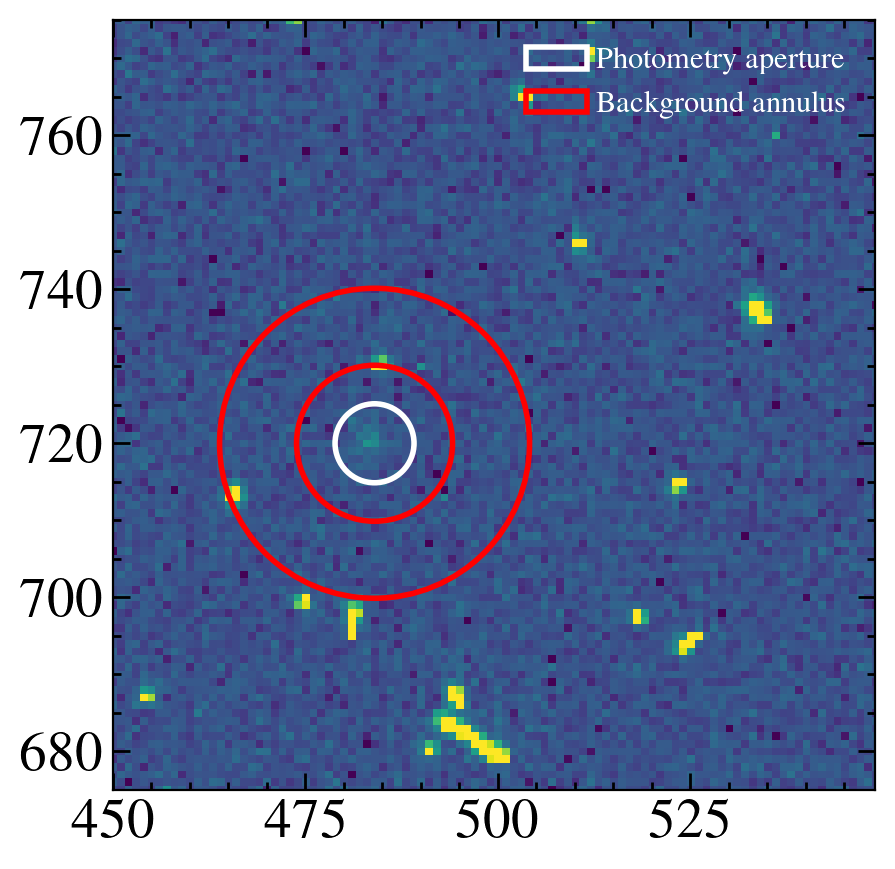

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01hzq_flc.fits
F275W
590.0
   aperture_sum  
-----------------
710.9546180934536
2.8655353573969255e-15 2.0421114966008808e-16
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     484     720          711            49.37     18.13               692.8


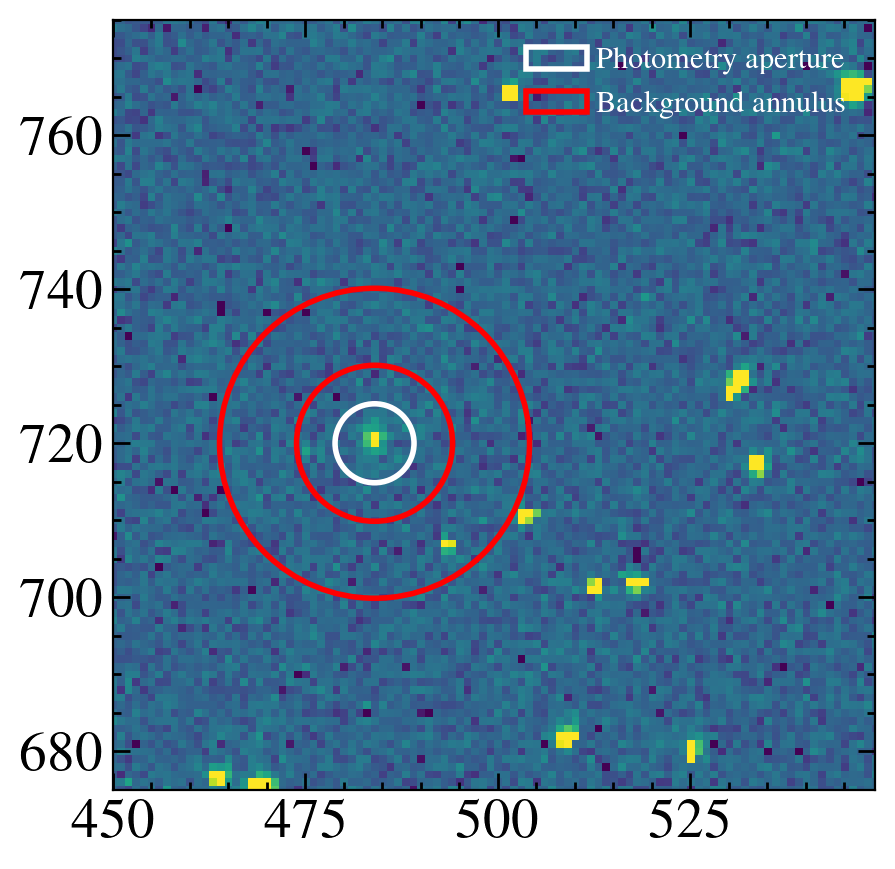

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/wfc3/if3i01i9q_flc.fits
F225W
590.0
   aperture_sum   
------------------
334.61317154053773
1.6184488419639153e-15 2.3522962196563666e-16
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     484     720        334.6            39.45     63.22               271.4


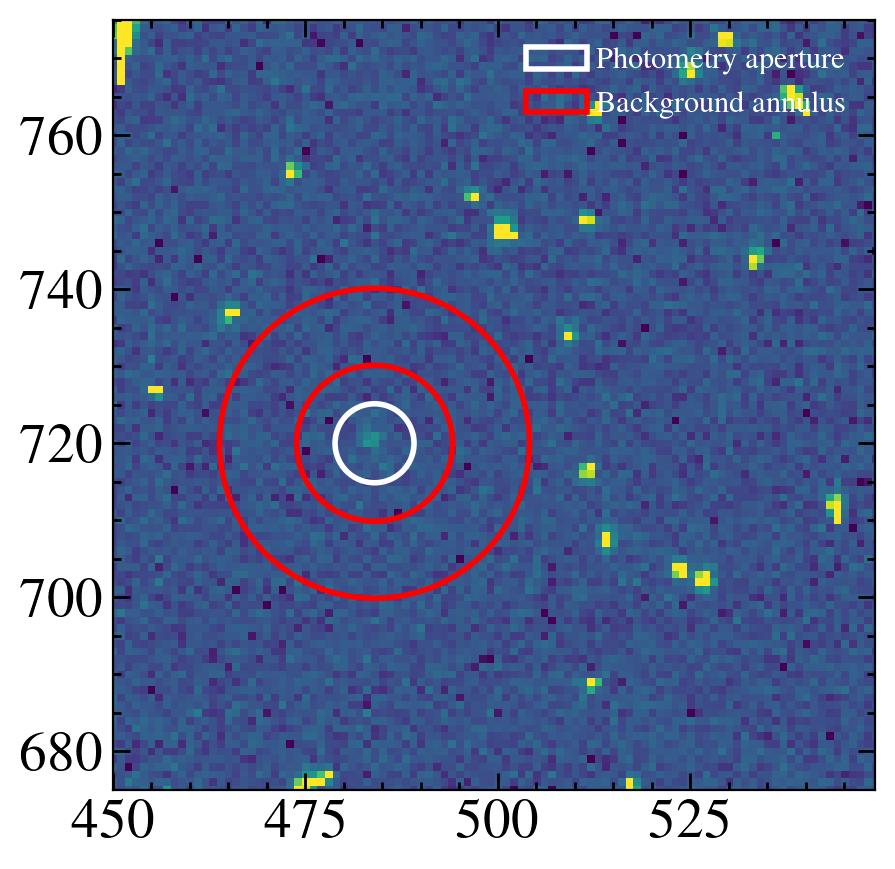

In [46]:
# wfc3_pos = [(489.752, 751.70)]
wfc3_pos = [(484, 720)]
pixscale = 0.039
ap_arc = '0.20' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
for flc in flcs:
    print(flc)
    hdul = fits.open(flc)
    filt = hdul[0].header['FILTER'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
    data = make_PAMcorr_image_UVIS(data, hdul[1].header, '{}../pams/'.format(path))
#     data = np.nan_to_num(data, 0.0)
    error = hdul[2].data
    dq = hdul[3].data
    mask = dq != 0
#     error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(450, 549)
    plt.ylim(675, 775)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(wfc3_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(wfc3_pos, r_in=ap_pix+5, r_out=ap_pix+15)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture, error=error, mask=mask)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
#     phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
#     phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
    ee = eetab['APER#{}'.format(ap_arc)][eetab['FILTER'] == filt][0]
#     print(ee[0])
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam /ee
    flux_err = phot_table['aperture_sum_err'][0]* photflam /ee
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)

    print(phot_table)
    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)

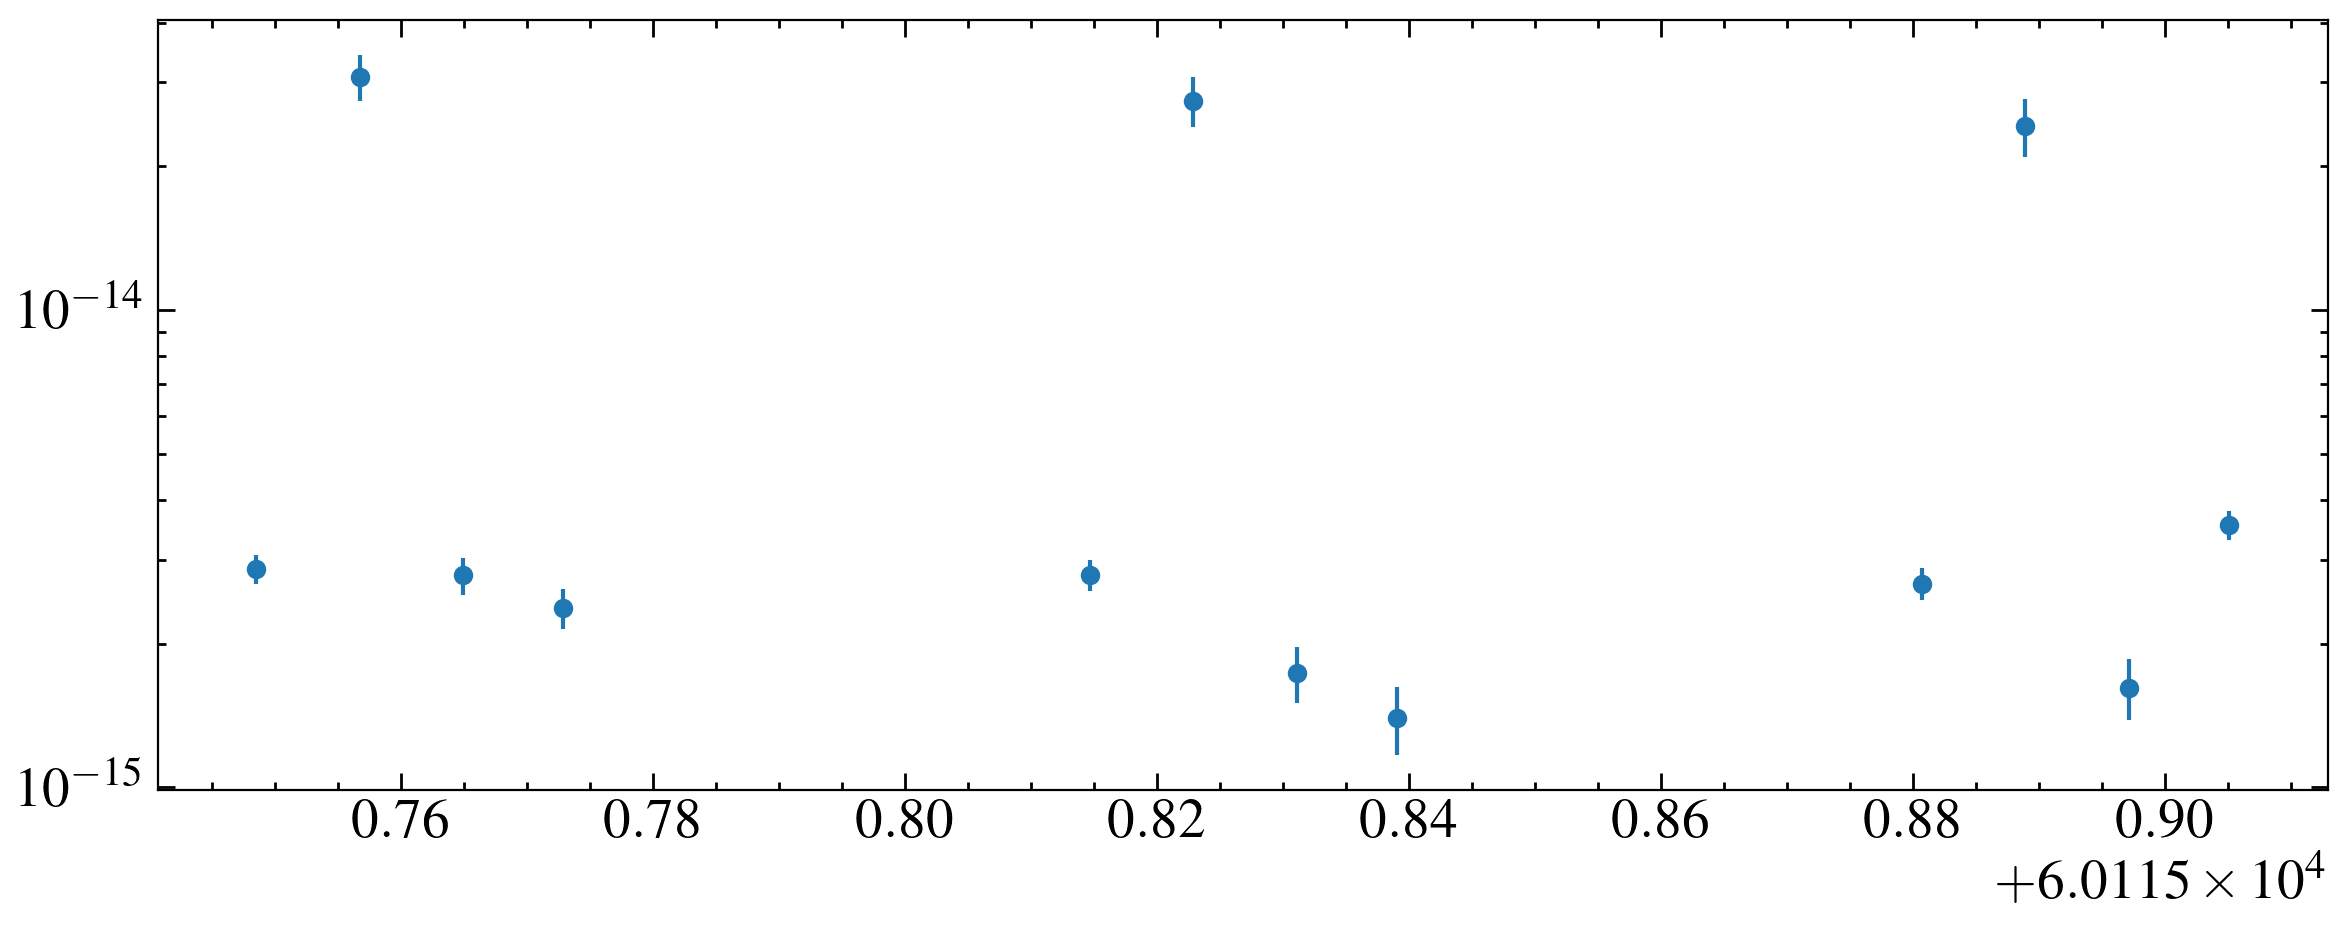

In [47]:
plt.errorbar(starts, fluxes, yerr=flux_errs, ls='none',marker='o')
plt.yscale('log')

In [48]:
filters

['F280N',
 'F225W',
 'F225W',
 'F275W',
 'F280N',
 'F225W',
 'F275W',
 'F280N',
 'F225W',
 'F225W',
 'F275W',
 'F225W']

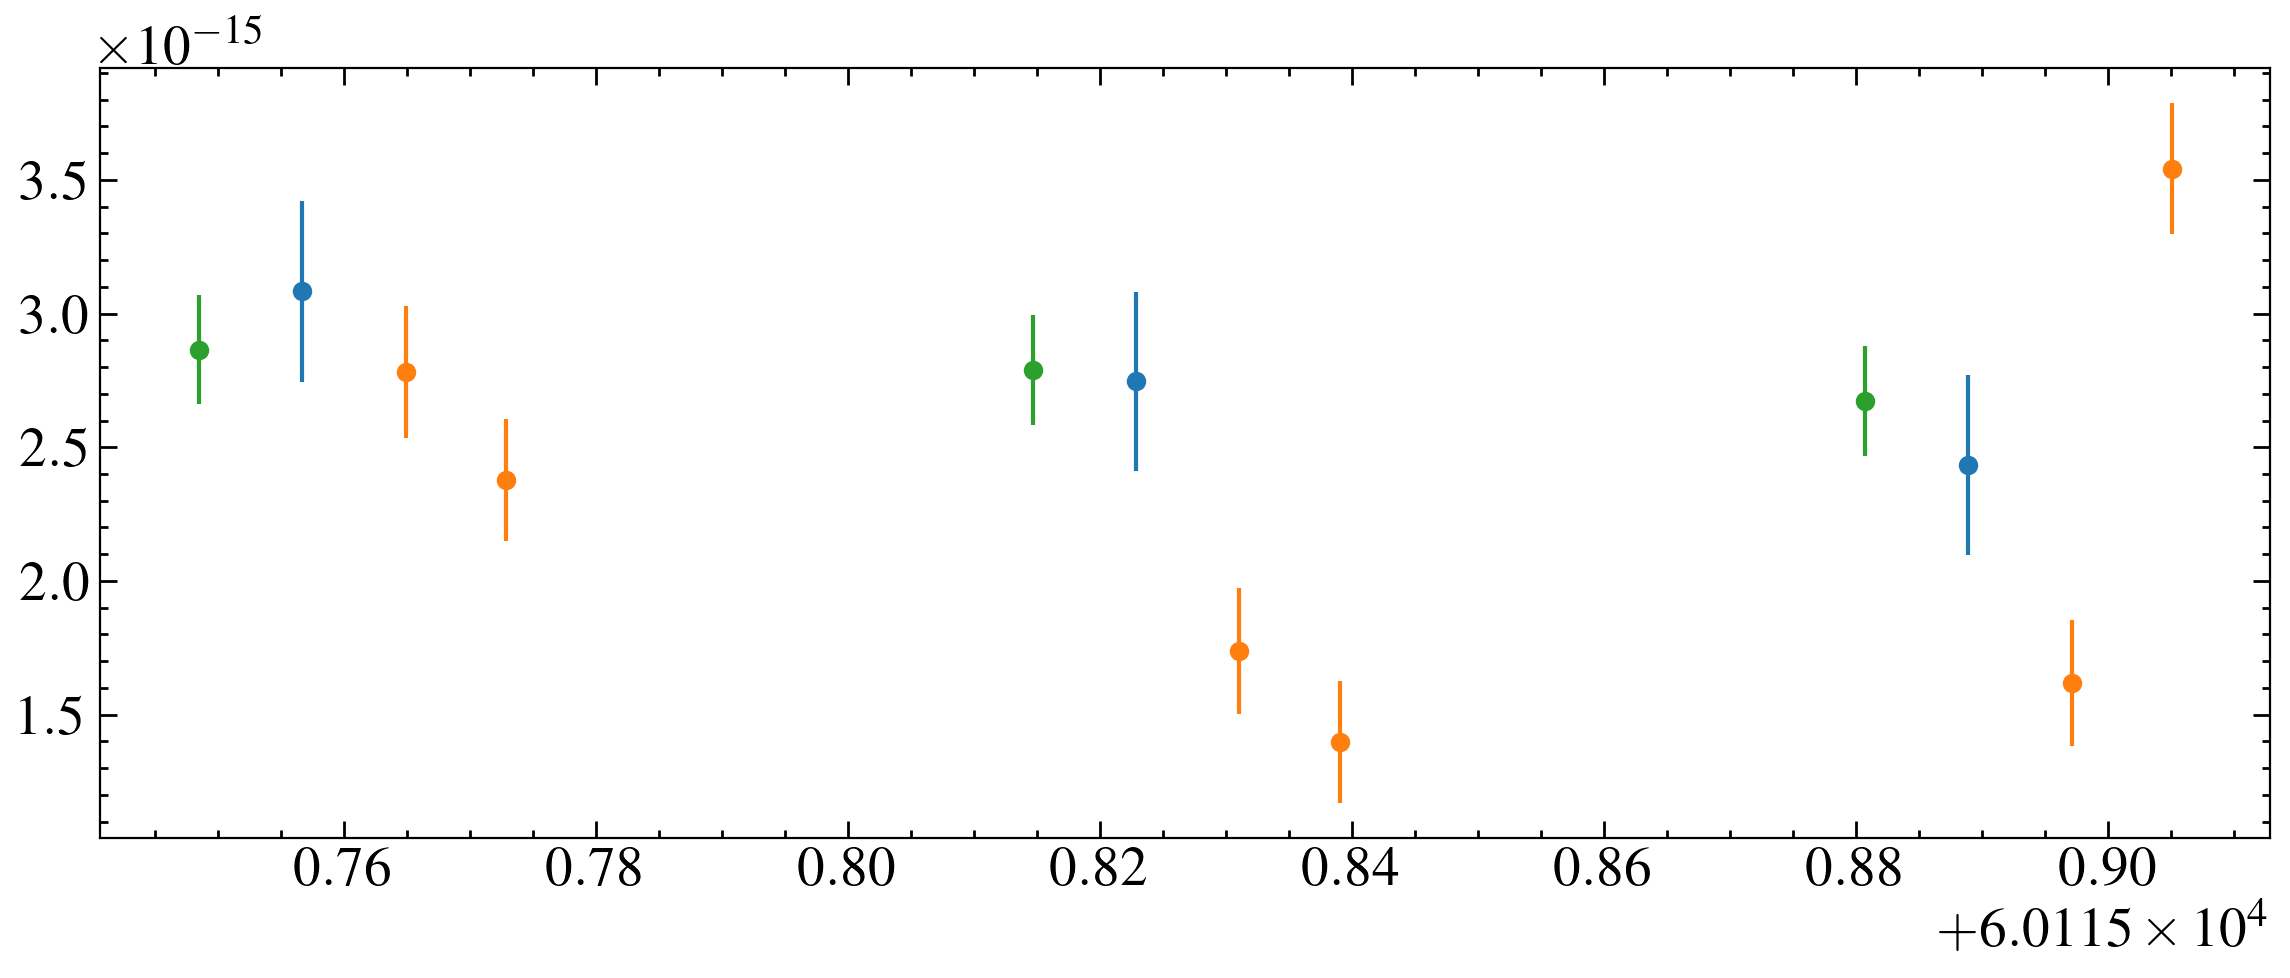

In [52]:
for i in range(len(starts)):
    if filters[i] == 'F280N':
        plt.errorbar(starts[i], fluxes[i]/10, yerr=flux_errs[i]/10, ls='none',marker='o', c='C0', label='F280N')
    elif filters[i] == 'F225W':
        plt.errorbar(starts[i], fluxes[i], yerr=flux_errs[i], ls='none',marker='o', c='C1', label='F225W')
    if filters[i] == 'F275W':
        plt.errorbar(starts[i], fluxes[i], yerr=flux_errs[i], ls='none',marker='o', c='C2', label='F275W')

In [58]:
for i in range(len(starts)):
    print(filters[i], fluxes[i], flux_errs[i],  fluxes[i]/flux_errs[i])

F280N 3.083766694000264e-14 3.3849434140782294e-15 9.110245923682657
F225W 2.7818779945262753e-15 2.4621805062210906e-16 11.298432375276379
F225W 3.541730221473765e-15 2.4597427815830186e-16 14.398782864582332
F275W 2.787822024648496e-15 2.062086908599843e-16 13.519420607453577
F280N 2.745906227463606e-14 3.3344592987618606e-15 8.234937006078335
F225W 1.3974209588410503e-15 2.279604370847709e-16 6.130102998185584
F275W 2.672810878324607e-15 2.0402199260252226e-16 13.10060177449499
F280N 2.4342314181696417e-14 3.371379186418818e-15 7.220283698658521
F225W 2.376573590223191e-15 2.278015971957571e-16 10.43264673943847
F225W 1.7370185208100567e-15 2.356747034222742e-16 7.370407156926486
F275W 2.8655353573969255e-15 2.0421114966008808e-16 14.03221793798548
F225W 1.6184488419639153e-15 2.3522962196563666e-16 6.880293512525157


In [57]:
np.array(fluxes)/flux_errs

array([ 9.11024592, 11.29843238, 14.39878286, 13.51942061,  8.23493701,
        6.130103  , 13.10060177,  7.2202837 , 10.43264674,  7.37040716,
       14.03221794,  6.88029351])